In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sys.path.append('../../')
import Constants as c
import Utilities as utils

In [2]:
# file = "calculate_metrics_h1_ML_combined.csv"
file_line = "./05_01_2020/performance_measures_Line.csv"
file_Module = "./05_01_2020/performance_measures_Module.csv"

df_Line = pd.read_csv(file_line)
df_Module = pd.read_csv(file_Module)

df = pd.concat([df_Line, df_Module])

In [3]:
# df.drop(df.columns[0], axis=1)
df.dropna(subset=[c.PRED_25], inplace=True)
df.dropna(subset=[c.PRED_50], inplace=True)
df = df.sample(n=500)

In [4]:
def hypothesisTest_Effort(model, task, pred, mean):
    print("Hypothesis test for {0} and task = '{1}'".format(model, task))
    
    model_records = None

    if task != "ALL":
        # filter1 = df[c.MODEL] == model
        filter = df[c.TASK] == task
        model_records = df[filter]
    else:
        model_records = df

    num_records = len(model_records)
    model_records_mean = round(model_records[pred].mean(),2)

    print("Number of records: {0}".format(num_records))
    print("Sample mean: ", model_records_mean)
    
    alpha = 0.05
    is_gaussian = utils.gaussian_test(model_records[pred], alpha)

    if is_gaussian:
        if num_records <= 60:
            utils.one_sample_t_test(model_records[pred], mean, alpha)
        else:
            utils.one_sample_z_test(model_records[pred], mean, alpha)
    else:
        utils.one_sample_sign_test(model_records[pred], mean, alpha)

    plt.figure(figsize=(8,3))
    plt.tight_layout()
    sb.distplot(model_records[pred], kde=False, bins=10)


In [5]:
task = "ALL"

Hypothesis test for Line and task = 'ALL'
Number of records: 500
Sample mean:  0.3
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  8.765584912069277e-05
One Sample Sign Test: 0.3 sample median is not likely to be greater than 0.33 (reject H0)


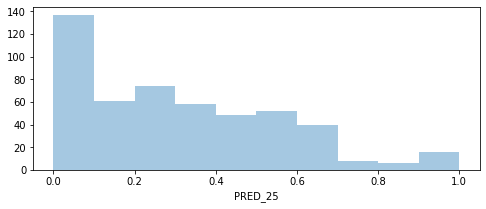

In [6]:
# t-test
hypothesisTest_Effort(c.LINE, task, c.PRED_25, 0.33)

Hypothesis test for Line and task = 'ALL'
Number of records: 500
Sample mean:  0.44
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  9.69845888481234e-16
One Sample Sign Test: 0.44 sample median is not likely to be greater than 0.6 (reject H0)


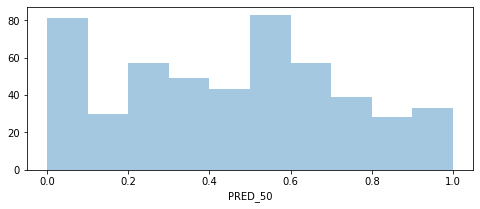

In [7]:
hypothesisTest_Effort(c.LINE, task, c.PRED_50, 0.60)

Hypothesis test for Module and task = 'ALL'
Number of records: 500
Sample mean:  0.3
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  2.4732207183986683e-45
One Sample Sign Test: 0.3 sample median is not likely to be greater than 0.53 (reject H0)


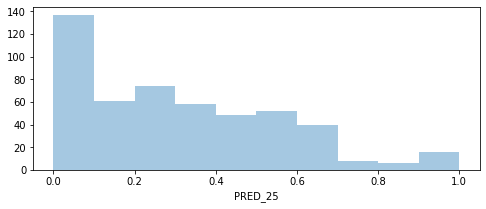

In [8]:
# t-test
hypothesisTest_Effort(c.MODULE, task, c.PRED_25, 0.53)

Hypothesis test for Module and task = 'ALL'
Number of records: 500
Sample mean:  0.44
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  9.352232258219671e-91
One Sample Sign Test: 0.44 sample median is not likely to be greater than 0.87 (reject H0)


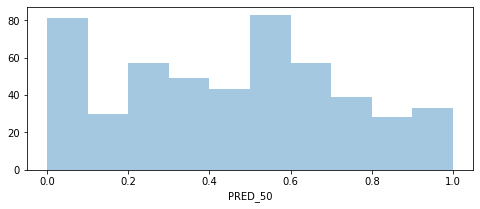

In [9]:
hypothesisTest_Effort(c.MODULE, task, c.PRED_50, 0.87)